<h1 align='center'>Construindo bons conjuntos de dados de treinamento - pré-processamento de dados</h1>
<p align= 'center'><img src=https://sloboda-studio.com/wp-content/uploads/2020/08/Group-192.jpg></p>
<p align= 'justify'>A qualidade dos dados e a quantidade de informações úteis que eles contêm são fatores-chave que determinam o quão bem um algoritmo de aprendizado de máquina pode aprender. Portanto, é absolutamente crítico garantir que examinemos e pré-processemos um conjunto de dados antes de alimentá-lo a um algoritmo de aprendizado.</p>

<h3>Lidando com dados perdidos</h3>
<p align= 'justify'>Não é incomum em aplicações do mundo real que nossos exemplos de treinamento estejam faltando um ou mais valores por vários motivos. Pode ter havido um erro no processo de coleta de dados, certas medidas podem não ser aplicáveis ou campos específicos podem ter sido simplesmente deixados em branco em uma pesquisa, por exemplo. Normalmente, vemos valores ausentes como espaços em branco em nossa tabela de dados ou como strings de espaço reservado, como <i>NaN</i>, que significa "não é um número" ou <i>NULL</i> (um indicador comumente usado de valores desconhecidos em bancos de dados relacionais). Infelizmente, a maioria das ferramentas computacionais são incapazes de lidar com esses valores ausentes ou produzirão resultados imprevisíveis se simplesmente os ignorarmos. Portanto, é crucial que cuidemos desses valores ausentes antes de prosseguirmos com análises adicionais.</p>

<h3>Identificando valores ausentes em dados tabulares</h3>

In [247]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


<p align='justify'>Para um DataFrame maior, pode ser tedioso procurar manualmente os valores ausentes; neste caso, podemos usar o método <i>isnull</i> para retornar um DataFrame com valores booleanos que indicam se uma célula contém um valor numérico <i>(False)</i> ou se faltam dados <i>(True)</i>. Usando o método <i>sum</i>, podemos retornar o número de valores ausentes por coluna da seguinte forma:</p>

In [248]:
# O somatório das colunas que possuem dados NaN ou Nulos.
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

<h4>Eliminando exemplos de treinamento ou recursos com valores ausentes</h4>

In [249]:
# Removendo todas as linhas que tem Nan
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [250]:
# Removendo todas as colunas que tem Nan
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [251]:
# Removendo as linhas se TODAS forem NaN.
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [252]:
# Removendo as linhas se tiver pelo menos que 4 valores reais.
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [253]:
# Removendo as linhas aonde aparece NaN em uma coluna específica, no caso "C".
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


<p align='justify'>Embora a remoção de dados ausentes pareça ser uma abordagem conveniente, ela também apresenta algumas desvantagens; por exemplo, podemos acabar removendo muitas amostras, o que impossibilitará uma análise confiável. Ou, se removermos muitas colunas de <i>features</i>, corremos o risco de perder informações valiosas que nosso classificador precisaria para discriminar entre as classes. Uma das alternativas mais usadas para lidar com valores ausentes é chamada de <b>Técnica de Interpolação</b>.</p>

<h3>Como imputar valores ausentes</h3>
<p align='justify'>Como foi dito anteriomente, excluir as linhas ou colunas pode comprometer dados valiosos, no conjunto como um todo. Como alteranativa, podemos usar diferentes técnicas de interpolação para estimar os valores ausentes dos outros exemplos de treinamento em nosso conjunto de dados. Uma das técnicas de interpolação mais comuns é a imputação média, onde simplesmente substituímos o valor ausente pelo valor médio de toda a coluna de <i>features</i>. Uma maneira conveniente de conseguir isso é usando a classe <i>SimpleImputer</i> do <i>scikit-learn</i>, conforme mostrado no código a seguir:</p>

In [254]:
# Conjunto de dados
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [255]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean') # Utilizando a MÉDIA. Poderíamos utilizar: "median"(Mediana) ou 'most_frequent'(Mais Frequente)

# O "most_frequent" é usando para colunas categóricas: cores, sexo, tamanho (P,M,G), entre outras.


imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [256]:
# Alternativamente poderíamos usar o Pandas "fillna" para prover o mesmo recurso.

df.fillna(df.mean()) 

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


<h3>Entendendo a API do estimador scikit-learn</h3>
<p align='justify'>Anteriormente, usamos a classe <i>SimpleImputer</i> do <i>scikit-learn</i> para imputar valores ausentes em nosso conjunto de dados. A classe <i>SimpleImputer</i> pertence às chamadas classes de transformadores no <i>scikit-learn</i>, que são usadas para transformação de dados. Os dois métodos essenciais desses estimadores são o ajuste e a transformação. O método <i>fit</i> é usado para aprender os parâmetros dos dados de treinamento e o método <i>transform</i> usa esses parâmetros para transformar os dados. Qualquer matriz de dados a ser transformada precisa ter o mesmo número de recursos que a matriz de dados que foi usada para ajustar o modelo.
<p align='center'><img src=https://www.bogotobogo.com/python/scikit-learn/images/scikit-data-processing1-missing-data/fit-transform-scikit-learn-estimator.png></p>


<p align='justify'>Os classificadores que usamos pertencem aos chamados estimadores do <i>scikit-learn</i>, com uma <i>API</i> conceitualmente muito semelhante à classe do transformador. Os estimadores têm um método de previsão, mas também podem ter um método de transformação. Como você deve se lembrar, também usamos o método de <i>fit</i> para aprender os parâmetros de um modelo quando treinamos esses estimadores para classificação. No entanto, em tarefas de aprendizado supervisionado, também fornecemos os rótulos de classe para ajustar o modelo, que podem ser usados para fazer previsões sobre novos exemplos de dados não rotulados por meio do método de previsão, conforme ilustrado na figura a seguir:</p>
<p align='center'><img src=https://www.bogotobogo.com/python/scikit-learn/images/scikit-data-processing1-missing-data/scikit-learn-predict-method.png></p>

<h4>Como lidar com dados categóricos</h4>
<p align='justify'>Até agora, trabalhamos apenas com valores numéricos. No entanto, não é incomum que conjuntos de dados do mundo real contenham uma ou mais colunas de recursos categóricos. Agora, faremos uso de exemplos simples, mas eficazes, para ver como lidar com esse tipo de dados em bibliotecas de computação numérica. Quando estamos falando de dados categóricos, temos que distinguir ainda mais entre características <b>ordinais e nominais</b>. Os recursos ordinais podem ser entendidos como valores categóricos que podem ser classificados ou ordenados. Por exemplo, o tamanho da camiseta seria um recurso ordinal, pois podemos definir uma ordem: XL > L > M. Em contrapartida, os recursos nominais não implicam em nenhuma ordem e, para continuar com o exemplo anterior, poderíamos pensar em a cor da camiseta como um recurso nominal, pois normalmente não faz sentido dizer que, por exemplo, o vermelho é maior que o azul.</p>

In [257]:
# Criando um Conjunto de dados com classes categóricas

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [258]:
# Mapeando recursos ordinais
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [259]:
# Se quiser reverter aos valores aprendidos.
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

<h4>Codificando rótulos de classe</h4>
<p align='justify'>Muitas bibliotecas de aprendizado de máquina exigem que os rótulos de classe sejam codificados como valores inteiros. Embora a maioria dos estimadores para classificação no <i>scikit-learn</i> converta rótulos de classe em inteiros internamente. Considera-se uma boa prática fornecer rótulos de classe como matrizes de inteiros para evitar falhas técnicas. Para codificar os rótulos de classe, podemos usar uma abordagem semelhante ao mapeamento de recursos ordinais discutidos anteriormente. Precisamos lembrar que os rótulos de classe não são ordinais e não importa qual número inteiro atribuímos a um rótulo de <i>string</i> específico. Assim, podemos simplesmente enumerar os rótulos das classes, começando em 0:</p>

In [260]:
import numpy as np

# Crie um dict de mapeamento para converter rótulos de classe de strings para inteiros

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [261]:
# Agora podemos converter os rótulos para converter rótulos de classe strings para inteiros
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [262]:
# Para reverter

inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [263]:
# Alternativamente, podemos usar o LabelEncoder
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [264]:
# Reverter o mapeamento utilizando o método inverse_transform
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

<h4>Executando a codificação one-hot em recursos nominais</h4>
<p align='justify'>Como os estimadores do <i>scikit-learn</i> para classificação tratam rótulos de classe como dados categóricos que não implicam em nenhuma ordem (nominal), usamos o <i>LabelEncoder</i> para codificar os rótulos de <i>string</i> em inteiros.</p>

In [265]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

<p align='justify'>Se pararmos neste ponto e alimentarmos o <i>array</i> em nosso classificador, cometeremos um dos erros mais comuns ao lidar com dados categóricos. Você consegue identificar o problema? Embora os valores de cor não venham em nenhuma ordem específica, um algoritmo de aprendizado agora assumirá que verde é maior que azul e vermelho é maior que verde. Embora essa suposição esteja incorreta, o algoritmo ainda pode produzir resultados úteis. No entanto, esses resultados não seriam ideais.</i>

<p align='justify'>Para lidar com esse tipo de problema, utilizamos a técnica do <i>one-hot encoding</i>. De maneira geral, estaremos transformando cada categoria em novas <i>features</i>(colunas). Então as cores (azul, verde e vermelho) seriam transformadas em 3 colunas.</p>

In [266]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

<p align='justify'>Observe que aplicamos o <i>OneHotEncoder</i> a apenas uma única coluna, (X[:, 0].reshape(-1, 1))), para evitar modificar também as outras duas colunas na matriz. Se quisermos transformar seletivamente colunas em um array com vários recursos, podemos usar o <i>ColumnTransformer</i>, que aceita uma lista de tuplas (nome, transformador, coluna(s)) da seguinte forma:</p>

In [267]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]), 
                               ('nothing', 'passthrough', [1, 2])]) # Usando o argumento 'passthrough' não acontece nada!!
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [268]:
# Usando o Pandas - get_dummies()
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


<p align='justify'>Quando estamos usando conjuntos de dados de codificação one-hot, temos que ter em mente que isso introduz multicolinearidade, o que pode ser um problema para certos métodos (por exemplo, métodos que exigem inversão de matriz). Se os recursos são altamente correlacionados, as matrizes são computacionalmente difíceis de inverter, o que pode levar a estimativas numericamente instáveis. Para reduzir a correlação entre as variáveis, podemos simplesmente remover uma coluna de recurso do <i>array</i> codificado <i>one-hot</i>. Observe que não perdemos nenhuma informação importante removendo uma coluna de recurso; por exemplo, se removermos a coluna color_blue, as informações do recurso ainda serão preservadas, pois se observarmos color_green=0 e color_red=0, isso implica que a observação deve ser azul.</p>

In [269]:
# Usando o argumento drop_first=True
pd.get_dummies(df[['price','color','size']],
                    drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [270]:
# No OneHotEncoder utilizando o drop="first" e o categories='auto'

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

<h4>Como particionar um conjunto de dados em conjuntos de dados de treinamento e teste separados</h4>
<p align='justify'>Lembre-se de que comparar previsões com rótulos verdadeiros no conjunto de teste pode ser entendido como a avaliação de desempenho imparcial de nosso modelo antes de deixá-lo solto no mundo real. Vamos preparar um novo conjunto de dados, o conjunto de dados <i>Wine</i>. Depois de pré-processarmos o conjunto de dados, exploraremos diferentes técnicas de seleção de recursos para reduzir a dimensionalidade de um conjunto de dados.</p>

In [271]:
# Carregando os dados
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels: ', np.unique(df_wine['Class label']))
df_wine.head()

Class labels:  [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [272]:
from sklearn.model_selection import train_test_split

# Particionando em conjuntos de treino e teste 
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3,     # Separando 30% para testes
                     random_state=0, 
                     stratify=y)        # Assegura que as classes de treino e teste terão classe proporcionais com base no original.

<h4>Trazendo recursos para a mesma escala</h4>
<p align='justify'>O dimensionamento de recursos é uma etapa crucial em nosso <i>pipeline</i> de pré-processamento que pode ser facilmente esquecido. Árvores de decisão e florestas aleatórias são dois dos poucos algoritmos de aprendizado de máquina em que não precisamos nos preocupar com o dimensionamento de recursos. Esses algoritmos são invariantes de escala. No entanto, a maioria dos algoritmos de aprendizado de máquina e otimização se comportam muito melhor se os recursos estiverem na mesma escala, quando implementamos o algoritmo de otimização de gradiente descendente.<p>
<p align='justify'>A importância do dimensionamento de recursos pode ser ilustrada por um exemplo simples. Vamos supor que temos dois recursos em que um recurso é medido em uma escala de 1 a 10 e o segundo recurso é medido em uma escala de 1 a 100.000, respectivamente.</p>

<p align='justify'>Agora, existem duas abordagens comuns para trazer diferentes recursos para a mesma escala: <b>normalização e padronização</b>. Esses termos são frequentemente usados ​​de forma bastante vaga em diferentes campos e o significado deve ser derivado do contexto. Na maioria das vezes, a normalização refere-se ao redimensionamento dos recursos para um intervalo de [0, 1], que é um caso especial de dimensionamento mínimo-máximo. Para normalizar nossos dados, podemos simplesmente aplicar a escala <i>min-max</i> a cada coluna de recurso, onde o novo valor, de um exemplo, pode ser calculado da seguinte forma:

In [273]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

<p align='justify'>Embora a normalização por meio do dimensionamento <i>min-max</i> seja uma técnica comumente usada que é útil quando precisamos de valores em um intervalo limitado, a padronização pode ser mais prática para muitos algoritmos de aprendizado de máquina, especialmente para algoritmos de otimização, como gradiente descendente.</p>
<p align='justify'>A razão é que muitos modelos lineares, como a regressão logística e SVM, inicializam os pesos em 0 ou pequenos valores aleatórios próximos a 0. Usando padronização, centralizamos o recurso colunas em média 0 com desvio padrão 1 para que as colunas de recursos tenham os mesmos parâmetros de uma distribuição normal padrão (média zero e variância unitária), o que facilita o aprendizado dos pesos. Além disso, a padronização mantém informações úteis sobre valores discrepantes e torna o algoritmo menos sensível a eles em contraste com o dimensionamento mínimo-máximo, que dimensiona os dados para um intervalo limitado de valores.</p>

In [274]:
# Implementando a Padronização
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [275]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('Standardized:', (ex - ex.mean()) / ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('  Normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

Standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
  Normalized: [0.  0.2 0.4 0.6 0.8 1. ]


<p align='justify'>Novamente, também é importante destacar que ajustamos a classe <i>StandardScaler</i> apenas uma vez – nos dados de treinamento – e usamos esses parâmetros para transformar o conjunto de dados de teste ou qualquer novo ponto de dados.</p>
<p align='justify'>Outros métodos mais avançados para dimensionamento de recursos estão disponíveis no <i>scikit-learn</i>, como o <i>RobustScaler</i>. O <i>RobustScaler</i> é especialmente útil e recomendado se estivermos trabalhando com pequenos conjuntos de dados que contêm <b>muitos valores discrepantes</b>. Da mesma forma, se o algoritmo de aprendizado de máquina aplicado a esse conjunto de dados for propenso a <i>overfitting</i>, o <i>RobustScaler</i> pode ser uma boa escolha. Operando em cada coluna de recurso independentemente, o <i>RobustScaler</i> remove o valor mediano e dimensiona o conjunto de dados de acordo com o 1º e o 3º quartil do conjunto de dados (ou seja, o 25º e o 75º quantil, respectivamente) de modo que valores mais extremos e valores discrepantes se tornem menos pronunciados.</p>

<h4>Selecionando recursos significativos</h4>
<p align='justify'>Nós já comentamos que os modelos que performam melhor no conjunto de treinamento em relação ao conjunto de teste é um indicador forte de <i>overfitting</i>.<i>Overfitting</i> significa que o modelo ajusta os parâmetros muito de perto em relação às observações particulares no conjunto de dados de treinamento, mas não generaliza bem para novos dados; dizemos que o modelo tem uma <b>alta variância</b>. A razão para o <i>overfitting</i> é que nosso modelo é muito complexo para os dados de treinamento fornecidos. As soluções comuns para reduzir o erro de generalização são as seguintes:</p>

<li>Coletar mais dados de treinamento</li>
<li>Introduzir uma penalidade por complexidade via regularização</li>
<li>Escolher um modelo mais simples com menos parâmetros</li>
<li>Reduzir a dimensionalidade dos dados</li>

<h5>Regularização L1 e L2 como penalidades contra a complexidade do modelo</h5>
<p align='justify'>A regularização <i>L2</i> é uma abordagem para reduzir a complexidade de um modelo penalizando grandes pesos individuais.Outra abordagem para reduzir a complexidade do modelo é a regularização <i>L1</i>. Ao contrário da regularização <i>L2</i>, a regularização <i>L1</i> geralmente produz vetores de recursos esparsos e a maioria dos pesos de recursos será zero. A esparsidade pode ser útil na prática se tivermos um conjunto de dados de alta dimensão com muitos recursos que são irrelevantes, especialmente nos casos em que temos mais dimensões irrelevantes do que exemplos de treinamento. Nesse sentido, a regularização <i>L1</i> pode ser entendida como uma técnica de seleção de atributos.</p>


In [276]:
# Para modelos regularizados no scikit-learn que suportam regularização L1, 
# podemos simplesmente definir o parâmetro de penalidade como 'l1' para obter uma solução esparsa

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',
                     C=1.0,                    # C=1.0 é o padrão. Se aumentar ou diminuir torna o efeito da regularização mais forte o fraco. 
                      solver='liblinear',      # lbfgs não suporta regularização L1
                       multi_class='ovr') 

lr.fit(X_train_std,y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [277]:
# Vemos que nosso modelo fez uma acurácia perfeita no treinamento e teste.
# O intercept_ corresponde ao w0
lr.intercept_

array([-1.26390989, -1.2158165 , -2.37027808])

<p align='justify'>Como ajustamos o objeto <i>LogisticRegression</i> em um conjunto de dados multiclasse por meio da abordagem <i>one-vs-rest (OvR)</i>, a primeira interceptação pertence ao modelo que se ajusta à classe 1 versus as classes 2 e 3, o segundo valor é a interceptação do modelo que se encaixa na classe 2 versus as classes 1 e 3, e o terceiro valor é a interceptação do modelo que se encaixa na classe 3 versus as classes 1 e 2:</p>

In [278]:
# O .coef_ corresponde ao wj para j>0
lr.coef_

array([[ 1.2462364 ,  0.18057504,  0.74594836, -1.16399031,  0.        ,
         0.        ,  1.16107952,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55700243,  2.50876295],
       [-1.53716483, -0.38734101, -0.99518108,  0.36508262, -0.0597712 ,
         0.        ,  0.66791128,  0.        ,  0.        , -1.93405994,
         1.23330738,  0.        , -2.2312404 ],
       [ 0.13582509,  0.16839098,  0.35728913,  0.        ,  0.        ,
         0.        , -2.43796373,  0.        ,  0.        ,  1.56359518,
        -0.81900634, -0.49228444,  0.        ]])

<p align='justify'>Como resultado da regularização <i>L1</i>, que, como mencionado, serve como método de seleção de atributos, treinamos um modelo robusto para os atributos potencialmente irrelevantes neste conjunto de dados.</p>
<p align='justify'>Os vetores de peso do exemplo anterior não são necessariamente esparsos porque contêm mais entradas diferentes de zero do que zero, <u>isso é importante observar</u>. No entanto, poderíamos impor a esparsidade (mais entradas zero) aumentando ainda mais a força da regularização, ou seja, escolhendo valores mais baixos para o parâmetro <i>C</i>.</p>
<p align='justify'>No último exemplo de regularização, variámos a intensidade da regularização e traçamos o caminho da regularização - os coeficientes de peso dos diferentes recursos para diferentes intensidades de regularização:</p>

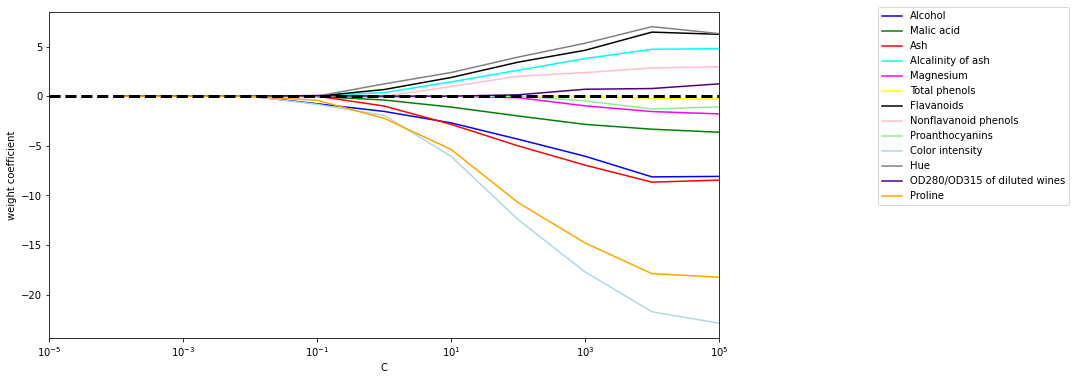

In [279]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)


for column, color in zip(range(weights.shape[1]), colors):
    
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

<p align='justify'>O gráfico resultante nos fornece mais informações sobre o comportamento da regularização <i>L1</i>. Como podemos ver, todos os pesos dos recursos serão zero se penalizarmos o modelo com um parâmetro de regularização forte (<i>C</i> < 0,01); <i>C</i> é o inverso do parâmetro de regularização (𝜆).</p>

<h4>Algoritmos de seleção de recursos sequenciais</h4>
<p align='justify'>Uma forma alternativa de reduzir a complexidade do modelo e evitar o <i>overfitting</i> é a redução da dimensionalidade por meio da seleção de recursos, o que é especialmente útil para modelos não regularizados. Existem duas categorias principais de técnicas de redução de dimensionalidade: seleção de recursos e extração de recursos. Por meio da seleção de recursos, selecionamos um subconjunto dos recursos originais, enquanto na extração de recursos, derivamos informações do conjunto de recursos para construir um novo subespaço de recursos.</p>

<p align='justify'>Veremos uma família clássica de algoritmos de seleção de recursos. A motivação por trás dos algoritmos de seleção de recursos é selecionar automaticamente um subconjunto de recursos que são mais relevantes para o problema, melhorar a eficiência computacional ou reduzir o erro de generalização do modelo removendo recursos ou ruídos irrelevantes, o que pode ser útil para algoritmos que não suportam a regularização.</p>
<p align='justify'>Um algoritmo clássico de seleção sequencial de atributos é a seleção sequencial para trás (<i>SBS</i>), que visa reduzir a dimensionalidade do subespaço inicial de atributos com um decaimento mínimo no desempenho do classificador para melhorar a eficiência computacional. Em certos casos, o <i>SBS</i> pode até melhorar o poder preditivo do modelo se um modelo sofrer de <i>overfitting</i>.</p>

<h5>Algoritmos de pesquisa <i>Greedy</i> (Ganaciosos)</h5>
<q align='justify'>Algoritmos <i>Greedy</i> (Ganaciosos) fazem escolhas localmente ótimas em cada estágio de um problema de busca combinatória e geralmente produzem uma solução subótima para o problema, em contraste com algoritmos de busca exaustivos, que avaliam todas as combinações possíveis e garantem encontrar a solução ótima. No entanto, na prática, uma busca exaustiva é muitas vezes <u>computacionalmente inviável</u>, enquanto algoritmos <i>greedy</i> permitem uma solução menos complexa e computacionalmente mais eficiente.</q>

<p align='justify'>A ideia por trás do algoritmo <i>SBS</i> é bastante simples: o <i>SBS</i> remove sequencialmente os recursos do subconjunto de recursos completo até que o novo subespaço de recursos contenha o número desejado de recursos. Para determinar qual característica deve ser removida em cada estágio, precisamos definir a função critério, <i>J</i>, que queremos minimizar.</p>

<p align='justify'>O critério calculado pela função critério pode ser simplesmente a diferença de desempenho do classificador antes e depois da remoção de um determinado recurso. Então, o recurso a ser removido em cada estágio pode ser simplesmente definido como o recurso que maximiza esse critério; ou em termos mais simples, em cada estágio, eliminamos o recurso que causa a menor perda de desempenho após a remoção. SIMPLES NÃO É??</p>

<p align='justify'>Infelizmente, o algoritmo <i>SBS</i> ainda não foi implementado no <i>scikit-learn</i>, porém ela se encontra implementada na biblioteca <i>mlxtend</i>.</p>

In [280]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(X_train_std, y_train)

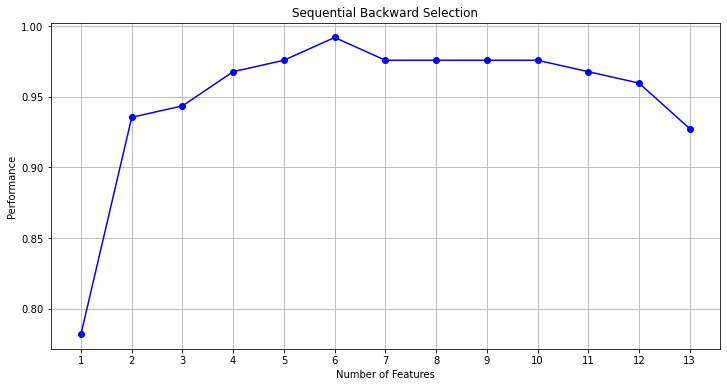

In [281]:
# Plotando os dados
fig1 = plot_sfs(sbs.get_metric_dict(), kind=None, figsize=(12,6))
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

<p align='justify'>Como podemos ver na figura, a precisão do classificador KNN melhorou no conjunto de dados de validação à medida que reduzimos o número de recursos, o que provavelmente se deve a uma diminuição na maldição da dimensionalidade. Além disso, podemos ver no gráfico a seguir que o classificador alcançou quase 100% de precisão para <b>k={6}</b>.Para satisfazer nossa curiosidade, vamos ver como é o menor subconjunto de recursos (k=6), que rendeu um desempenho tão bom no conjunto de dados de validação:</p>

In [282]:
table = pd.DataFrame.from_dict(sbs.get_metric_dict(confidence_interval=0.90)).T
table = pd.DataFrame(table.loc[6]).T
table

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 2, 3, 6, 9, 12)","[1.0, 0.967741935483871, 1.0, 1.0]",0.991935,"(0, 2, 3, 6, 9, 12)",0.017192,0.013968,0.008065


In [283]:
# Comparar a Acurácia no conjunto original
knn.fit(X_train_std,y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:    ', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy:     0.9629629629629629


In [284]:
k6 = [0,2,3,6,9,12] # Separando as colunas que tiveram melhor desempenho

knn.fit(X_train_std[:, k6], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k6], y_train))
print('Test accuracy:    ', knn.score(X_test_std[:, k6], y_test))

Training accuracy: 0.9919354838709677
Test accuracy:     0.9629629629629629


<p align='justify'>Pelo visto não tivemos grandes alterações de métricas em ambos conjuntos. Uma coisa que temos que ter em mente é que conjuntos pequenos de dados, tais como <i>Wine, Iris</i>, entre outros, são suscetíveis à aleatoriedade. Por outro lado, vemos que conseguimos alcançar o mesmo resultado com apenas metade do conjunto (6 colunas apenas!). Isso, computacionalmente falando, já é uma grande vitória. Além disso, ao reduzir o número de características, obtivemos um modelo mais simples e mais fácil de interpretar.</p>

<h4>Avaliando a importância do recurso com florestas aleatórias</h4>

<p align='justify'>Aprendemos como usar a regularização <i>L1</i> para zerar recursos irrelevantes por meio de regressão logística e como usar o algoritmo <i>SBS</i> para seleção de recursos e aplicá-lo a um algoritmo <i>KNN</i>. Outra abordagem útil para selecionar recursos relevantes de um conjunto de dados é usar uma floresta aleatória, uma técnica de classificação usando o <i>scikit-learn</i>. Usando uma floresta aleatória, podemos medir a importância do recurso como a diminuição média da impureza calculada a partir de todas as árvores de decisão na floresta, sem fazer suposições sobre se nossos dados são linearmente separáveis ​​ou não.</p>
<p align='justify'>A implementação de floresta aleatória no <i>scikit-learn</i> já coleta os valores de importância do recurso para que possamos acessá-los através do atributo <i>feature_importances_</i> após ajustar um <i>RandomForestClassifier</i>. Vamos treinar uma floresta de 500 árvores no conjunto de dados <i>Wine</i> e classificar os 13 recursos por suas respectivas medidas de importância - lembre-se de que os nós não precisam usar recursos padronizados ou normalizados em modelos baseados em árvore:</p>

In [285]:
np.argsort(forest.feature_importances_)[::-1]

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2], dtype=int64)

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


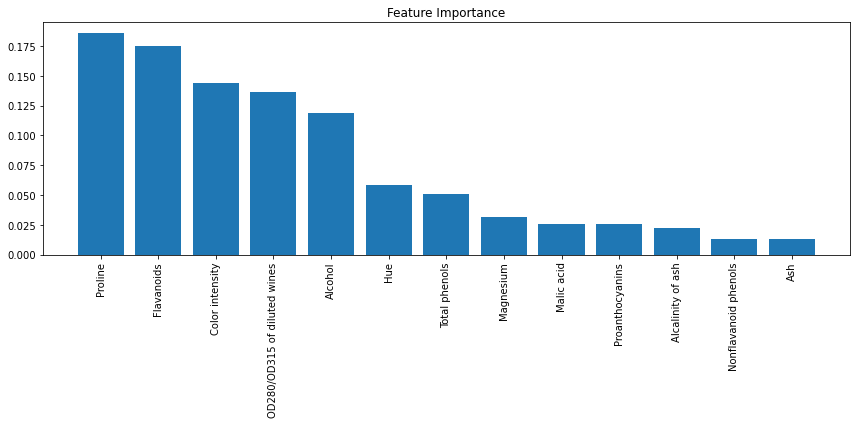

In [286]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, # 500 árvores
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize=(12,6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

<p align='justify'>Depois de executar o código, criamos um gráfico que classifica os diferentes recursos no conjunto de dados do<i>Wine</i> por sua importância relativa. Observe que os valores de importância do recurso são normalizados de forma a somar 1.0.</p>

<p align='justify'>Podemos concluir que os níveis de prolina e flavonóides, a intensidade da cor, a difração OD280/OD315 e a concentração de álcool do vinho são as características mais discriminativas no conjunto de dados com base na diminuição média de impureza nas 500 árvores de decisão.</p>
<p align='justify'>Só para constar, 4 dos 6 recursos mais bem classificados no gráfico também estão na seleção de subconjunto de 6 recursos do algoritmo SBS que implementamos anteriomente (Alcohol, Flavanoids, Color intensity, Proline).</p>

In [287]:
# Características mais 
features = str(table.feature_idx.values).replace('[(','').replace(')]','').split(',')
features = [int(x) for x in features]
for x in features:
    print(feat_labels[x])

Alcohol
Ash
Alcalinity of ash
Flavanoids
Color intensity
Proline


<p align='justify'>No entanto, no que diz respeito à interpretabilidade, a técnica de floresta aleatória vem com uma "pegadinha" importante que vale a pena mencionar. Se dois ou mais recursos são altamente correlacionados, um recurso pode ter uma classificação muito alta, enquanto as informações sobre o(s) outro(s) recurso(s) podem não ser totalmente capturadas. Por outro lado, não precisamos nos preocupar com esse problema se estivermos apenas interessados ​​no desempenho preditivo de um modelo, em vez da interpretação dos valores de importância das características.</p>
<p align='justify'>Para concluir esta seção sobre valores de importância de recursos e florestas aleatórias, vale a pena mencionar que o <i>scikit-learn</i> também implementa um objeto <i>SelectFromModel</i> que seleciona recursos com base em um limite especificado (<i>threshold</i>) pelo usuário após o ajuste do modelo, que é útil se quisermos usar o <i>RandomForestClassifier</i> como um seletor de recursos e uma etapa intermediária em um objeto <i>Pipeline</i> do <i>scikit-learn</i>, que nos permite conectar a diferentes etapas de pré-processamento com um estimador. Por exemplo, poderíamos definir o limite como 0,1 para reduzir o conjunto de dados aos cinco recursos mais importantes usando o seguinte código:</p>

In [288]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Número de características que atendem a esse critério de limite:', 
      X_selected.shape[1])

Número de características que atendem a esse critério de limite: 5


In [289]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
